# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

- The used car dealership intrested in recommendations of what cosumers value in a used car.

- The Goal is to identify what features impacts the car price from the given Dataset of information on 426K cars.

- To idenitfy the features we select the regression model to predict the price and which features has highest coefficient for the price prediction.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

- Describe the data description
- Check the summary of the data to understand the categorical and numeric feature in the data set

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

In [74]:
# Load the data using panadas
data = pd.read_csv('data/vehicles.csv')

In [75]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

(426880, 18)

In [76]:
# As there are lot of cateorical column. We can check the summary

for c in data.columns:
    print ("---- %s ---" % c)
    print (data[c].value_counts())

---- id ---
id
7222695916    1
7313139418    1
7313423023    1
7313423324    1
7313424533    1
             ..
7314655506    1
7314655833    1
7314657468    1
7314659947    1
7301591129    1
Name: count, Length: 426880, dtype: int64
---- region ---
region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: count, Length: 404, dtype: int64
---- price ---
price
0        32895
6995      3169
7995      3129
9995      2867
8995      2837
         ...  
21298        1
49217        1
63195        1
19709        1
17873        1
Name: count, Length: 15655, dtype: int64
---- year ---
year
2017.0    36420
2018.0    36369
2015.0    31538
2013.0    30794
2016.0    30434
          ...  
1943.0     

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [77]:
# Identify any duplicate data
data.duplicated().sum()

0

In [78]:
# VIN and ID column can be dropped as it is not going to have impact on the Price.
df_vechile = data.drop(['id','VIN'], axis=1)
df_vechile.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [79]:
# Identify the missing data count for each column
df_vechile.isna().sum()

region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [80]:
# Percent of missing data
df_vechile.isna().sum()/data.shape[0]*100

region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64

In [81]:
# Identify any duplicate data
df_vechile.duplicated().sum()

56415

In [82]:
# Remove Duplicate Data as having one value for that is enough.
df_vechile = df_vechile.drop_duplicates()

In [83]:
df_vechile.duplicated().sum()

0

In [84]:
# Remove the Size column as there is 71% missing value hence it may not have impact on the features
df_vechile = df_vechile.drop(['size'], axis=1)

In [85]:
df_vechile['condition'].value_counts().idxmax()

'good'

In [86]:
# Inspect condition column and fill the missing value with mode and drop the salvage
df_vechile['condition'].fillna(df_vechile['condition'].value_counts().idxmax(), inplace=True)
df_vechile.drop(df_vechile[df_vechile['condition'] == 'salvage'].index,inplace=True )
df_vechile['condition'].value_counts()

condition
good         257736
excellent     86167
like new      18278
fair           6592
new            1111
Name: count, dtype: int64

In [87]:
# Inspect cylinders column and fill the missing value with other

df_vechile['cylinders'].fillna('other', inplace=True)
df_vechile['cylinders'].value_counts()

cylinders
other           151749
6 cylinders      83778
4 cylinders      66442
8 cylinders      64382
5 cylinders       1498
10 cylinders      1295
3 cylinders        555
12 cylinders       185
Name: count, dtype: int64

In [88]:
# Inspect drive column and fill the missing value with other
df_vechile['drive'].fillna('other', inplace=True)
df_vechile['drive'].value_counts()

drive
4wd      113084
other    112254
fwd       90939
rwd       53607
Name: count, dtype: int64

In [89]:
# Inspect type column and fill the missing value with other
df_vechile['type'].fillna('other', inplace=True)
df_vechile['type'].value_counts()

type
other          98597
sedan          74928
SUV            66232
pickup         38592
truck          30076
coupe          17563
hatchback      15131
wagon           9128
van             7424
convertible     6934
mini-van        4255
offroad          569
bus              455
Name: count, dtype: int64

In [90]:
# Inspect paint_color column and fill the missing value with Unknown
df_vechile['paint_color'].fillna('Unknown', inplace=True)
df_vechile['paint_color'].value_counts()

paint_color
Unknown    108522
white       70202
black       55482
silver      37527
blue        27455
red         27133
grey        21065
green        6546
brown        5881
custom       5750
yellow       1946
orange       1769
purple        606
Name: count, dtype: int64

In [91]:
# Inspect manufacturer column and fill the missing value with Unknown
df_vechile['manufacturer'].fillna('Unknown', inplace=True)
df_vechile['manufacturer'].value_counts()

manufacturer
ford               61163
chevrolet          47420
toyota             29596
honda              18340
jeep               16211
nissan             16075
ram                15590
Unknown            15174
gmc                14614
bmw                13004
dodge              11460
mercedes-benz      10413
hyundai             8590
volkswagen          8437
subaru              8273
lexus               7252
kia                 7079
audi                6898
cadillac            6053
acura               5537
chrysler            5198
buick               4838
mazda               4777
infiniti            4374
lincoln             3830
volvo               3010
mitsubishi          2900
mini                2111
pontiac             2054
rover               1859
jaguar              1846
porsche             1209
mercury             1022
saturn               958
alfa-romeo           865
tesla                830
fiat                 706
harley-davidson      133
ferrari               84
datsun      

In [92]:
# Inspect model column and fill the missing value with Unknown
df_vechile['model'].fillna('Unknown', inplace=True)
df_vechile['model'].value_counts()

model
f-150                         6546
Unknown                       4665
silverado 1500                4245
1500                          3371
camry                         2554
                              ... 
1992 corvette  convertible       1
encore gx awd 4dr essence        1
libert sport 4 x 4               1
trailblazer ltz 4x4              1
Paige Glenbrook Touring          1
Name: count, Length: 29603, dtype: int64

In [93]:
# Inspect fuel column and fill the missing value with higher fuel count as it is having < 1 %
df_vechile['fuel'].fillna('gas', inplace=True)
df_vechile['fuel'].value_counts()

fuel
gas         309516
other        28207
diesel       25896
hybrid        4672
electric      1593
Name: count, dtype: int64

In [94]:
# Inspect odometer column and fill the missing value with higher odometer count as it is having < 1 %
df_vechile['odometer'].fillna(1.0, inplace=True)
df_vechile['odometer'].value_counts()

odometer
1.0         5368
100000.0    1798
0.0         1608
200000.0    1520
150000.0    1355
            ... 
231736.0       1
168829.0       1
164576.0       1
251605.0       1
26892.0        1
Name: count, Length: 104772, dtype: int64

In [95]:
# Inspect title_status column and fill the missing value with missing value
df_vechile['title_status'].fillna('missing', inplace=True)
df_vechile.drop(df_vechile[df_vechile['title_status'] == 'salvage'].index,inplace=True )
df_vechile['title_status'].value_counts()

title_status
clean         350947
missing         7432
rebuilt         6673
lien            1394
parts only       152
Name: count, dtype: int64

In [96]:
# Inspect transmission column and fill the missing value with other
df_vechile['transmission'].fillna('other', inplace=True)
df_vechile['transmission'].value_counts()

transmission
automatic    281198
other         63186
manual        22214
Name: count, dtype: int64

In [97]:
# Inspect year column and fill the missing value with 0
df_vechile['year'].fillna(0, inplace=True)
df_vechile['year'].value_counts()

year
2018.0    32406
2017.0    31045
2015.0    26225
2013.0    25706
2016.0    25654
          ...  
1915.0        1
1902.0        1
1905.0        1
1918.0        1
1943.0        1
Name: count, Length: 114, dtype: int64

In [98]:
# Recheck for missing value after imputing the missing values for all the columns
df_vechile.isna().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

In [99]:
df_vechile['title_status'].value_counts()

title_status
clean         350947
missing         7432
rebuilt         6673
lien            1394
parts only       152
Name: count, dtype: int64

In [100]:
# Copy the Data after clean for later analysis
df_clean = df_vechile[(df_vechile['price'] >= 1000) & (df_vechile['price'] <= 70000)]

In [101]:
# Converting Ordinal Categorical Column condition, cylinders and title_status to Numeric
# Using Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder, TargetEncoder
from sklearn.compose import make_column_transformer

target_ordinal_ohe = make_column_transformer((OrdinalEncoder(categories = [['fair', 'good', 'excellent', 'like new', 'new']]),['condition']),
                      (OrdinalEncoder(categories = [['other', '3 cylinders', '4 cylinders', '5 cylinders', '6 cylinders', '8 cylinders', '10 cylinders', '12 cylinders']]),['cylinders']),
                      (OrdinalEncoder(categories = [['parts only', 'missing', 'rebuilt', 'lien', 'clean']]),['title_status']),
                      
                    remainder='passthrough')

df_vechile[['condition','cylinders','title_status']] = target_ordinal_ohe.fit_transform(df_vechile[['condition','cylinders','title_status']])




In [102]:
df_vechile.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,prescott,6000,0.0,Unknown,Unknown,1.0,0.0,gas,1.0,1.0,other,other,other,Unknown,az
1,fayetteville,11900,0.0,Unknown,Unknown,1.0,0.0,gas,1.0,1.0,other,other,other,Unknown,ar
2,florida keys,21000,0.0,Unknown,Unknown,1.0,0.0,gas,1.0,1.0,other,other,other,Unknown,fl
3,worcester / central MA,1500,0.0,Unknown,Unknown,1.0,0.0,gas,1.0,1.0,other,other,other,Unknown,ma
4,greensboro,4900,0.0,Unknown,Unknown,1.0,0.0,gas,1.0,1.0,other,other,other,Unknown,nc


In [103]:
df_vechile.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366598 entries, 0 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        366598 non-null  object 
 1   price         366598 non-null  int64  
 2   year          366598 non-null  float64
 3   manufacturer  366598 non-null  object 
 4   model         366598 non-null  object 
 5   condition     366598 non-null  float64
 6   cylinders     366598 non-null  float64
 7   fuel          366598 non-null  object 
 8   odometer      366598 non-null  float64
 9   title_status  366598 non-null  float64
 10  transmission  366598 non-null  object 
 11  drive         366598 non-null  object 
 12  type          366598 non-null  object 
 13  paint_color   366598 non-null  object 
 14  state         366598 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 44.8+ MB


In [104]:
# Drop the NaN value for price as it the model needs to learn the price
df_vechile.drop(df_vechile[df_vechile['price'].isna()].index,inplace=True )


In [105]:
df_vechile.select_dtypes(include=['object']).columns

Index(['region', 'manufacturer', 'model', 'fuel', 'transmission', 'drive',
       'type', 'paint_color', 'state'],
      dtype='object')

In [106]:
# Converting rest of the Categorical Column to Numeric
# Using Mean Encoder
for column in df_vechile.select_dtypes(include=['object']).columns:

    Mean_encoded_subject = df_vechile.groupby([column])['price'].mean().to_dict() 

    df_vechile[column] =  df_vechile[column].map(Mean_encoded_subject) 
  


In [107]:
# Check if the all Categorical Column data converted to Numeric
df_vechile.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,23310.243451,6000,0.0,36857.190783,1.369198e+06,1.0,0.0,83581.282393,1.0,1.0,29795.565331,117237.752655,198061.328712,148233.254189,19105.631420
1,16699.301406,11900,0.0,36857.190783,1.369198e+06,1.0,0.0,83581.282393,1.0,1.0,29795.565331,117237.752655,198061.328712,148233.254189,18829.526070
2,26613.400000,21000,0.0,36857.190783,1.369198e+06,1.0,0.0,83581.282393,1.0,1.0,29795.565331,117237.752655,198061.328712,148233.254189,18630.042830
3,16039.548235,1500,0.0,36857.190783,1.369198e+06,1.0,0.0,83581.282393,1.0,1.0,29795.565331,117237.752655,198061.328712,148233.254189,16285.323269
4,15989.365172,4900,0.0,36857.190783,1.369198e+06,1.0,0.0,83581.282393,1.0,1.0,29795.565331,117237.752655,198061.328712,148233.254189,35541.036310


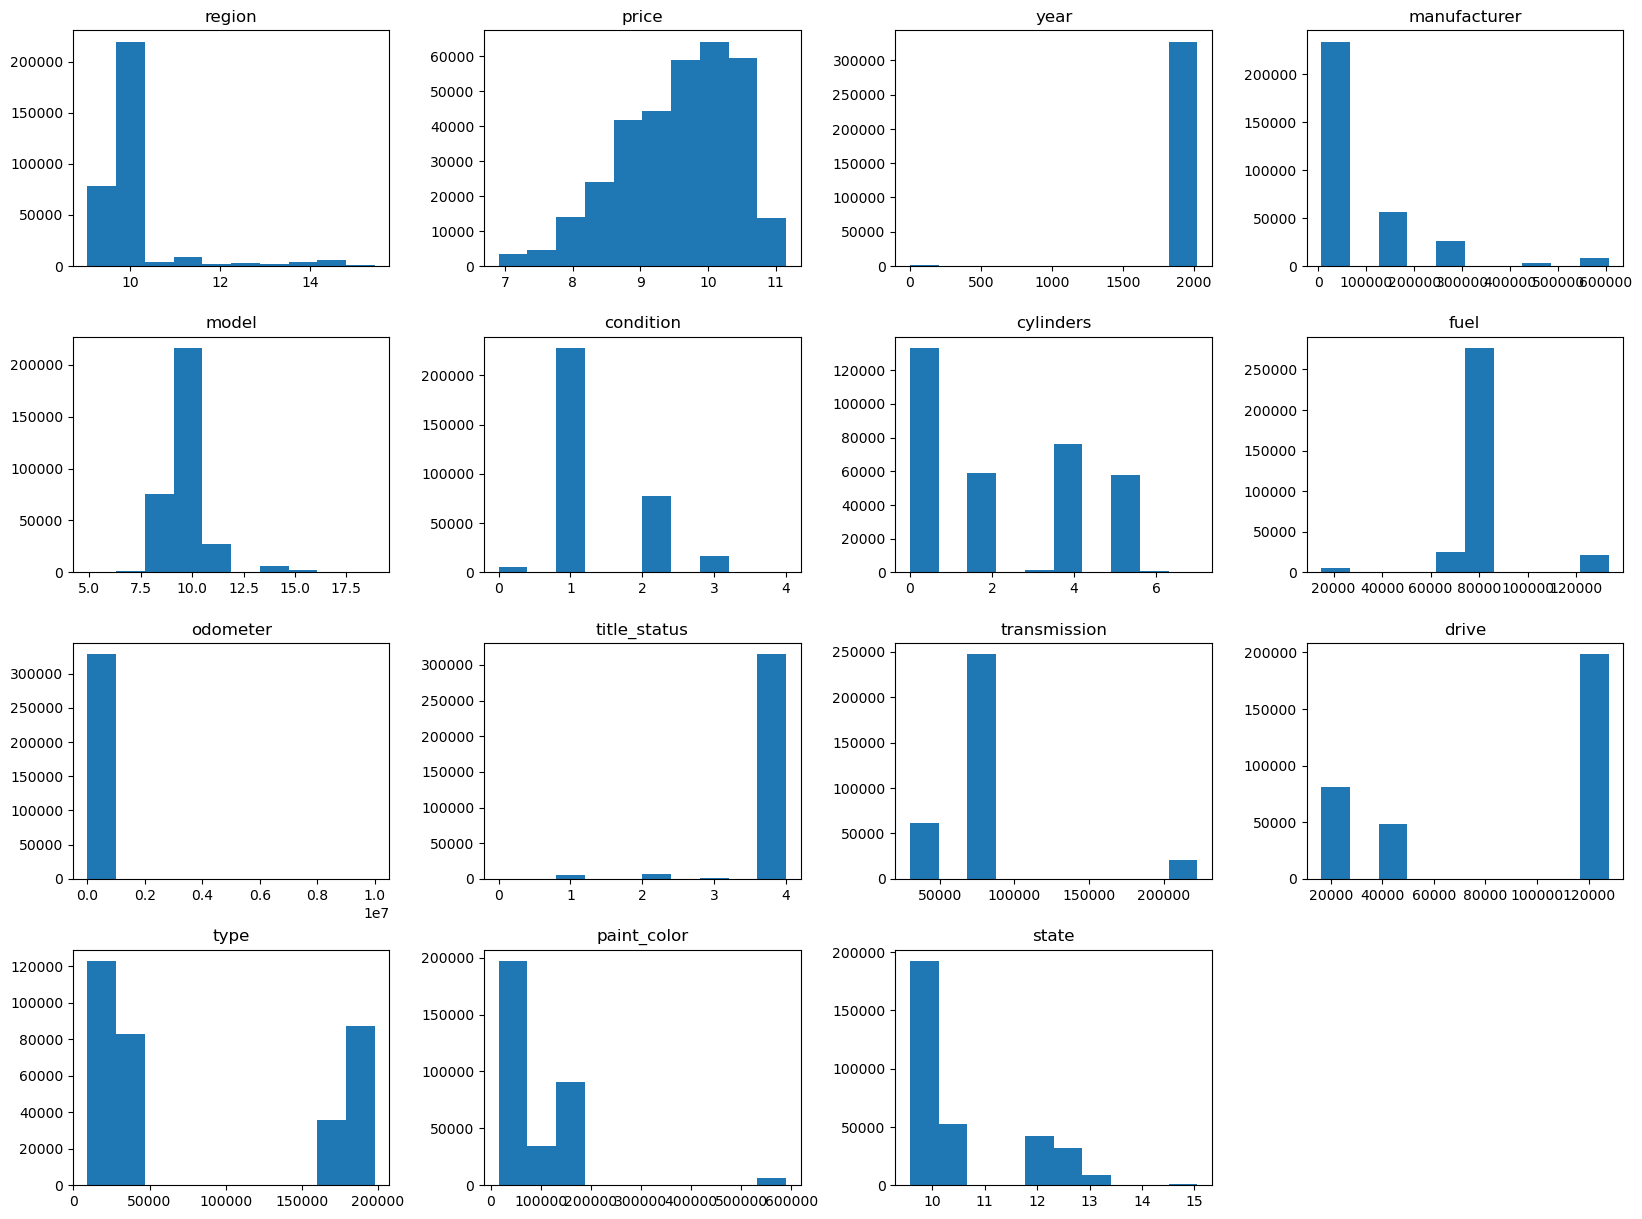

In [256]:
# Check the hist of all the features to check how the data is spreaded
df_vechile.hist(figsize = (15, 8), grid = False);

In [109]:
# Check if the all Categorical Column type converted to Numeric or float64
df_vechile.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366598 entries, 0 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        366598 non-null  float64
 1   price         366598 non-null  int64  
 2   year          366598 non-null  float64
 3   manufacturer  366598 non-null  float64
 4   model         366598 non-null  float64
 5   condition     366598 non-null  float64
 6   cylinders     366598 non-null  float64
 7   fuel          366598 non-null  float64
 8   odometer      366598 non-null  float64
 9   title_status  366598 non-null  float64
 10  transmission  366598 non-null  float64
 11  drive         366598 non-null  float64
 12  type          366598 non-null  float64
 13  paint_color   366598 non-null  float64
 14  state         366598 non-null  float64
dtypes: float64(14), int64(1)
memory usage: 44.8 MB


In [110]:
# Checking the mean and standard deviation of each features.
for column in df_vechile.columns:

     print(f" Mean and STD {column} : {df_vechile[column].mean()}, {df_vechile[column].std()}")


 Mean and STD region : 84978.85130851775, 348311.45142201456
 Mean and STD price : 84978.85130851778, 13145695.333431398
 Mean and STD year : 2005.6948428523888, 104.61665715191815
 Mean and STD manufacturer : 84978.8513085178, 120931.44060310783
 Mean and STD model : 84978.85130851778, 1529395.0861242083
 Mean and STD condition : 1.3228113628552256, 0.6081797570371407
 Mean and STD cylinders : 2.1711929688650784, 2.040742669897569
 Mean and STD fuel : 84978.85130851778, 16089.563773875634
 Mean and STD odometer : 95811.16890981402, 207109.82819122318
 Mean and STD title_status : 3.8973153154136138, 0.5051326931323493
 Mean and STD transmission : 84978.85130851778, 40927.34269569981
 Mean and STD drive : 84978.85130851777, 47810.65557384149
 Mean and STD type : 84978.8513085178, 79627.51646210444
 Mean and STD paint_color : 84978.85130851778, 86387.417827367
 Mean and STD state : 84978.85130851778, 196817.1280866403


Text(0.5, 1.0, 'Distribution of price')

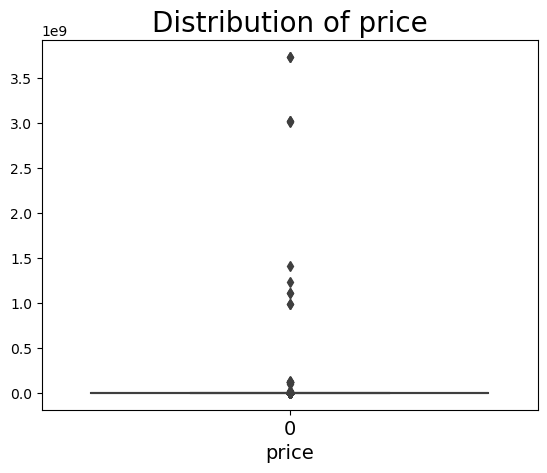

In [111]:
# Check the outlier for price
ax = sns.boxplot(df_vechile.price)

# notation indicating an outlier
ax.annotate('Outlier', xy=(190,0), xytext=(186,-0.05), fontsize=14,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

# xtick, label, and title
plt.xticks(fontsize=14)
plt.xlabel('price', fontsize=14)
plt.title('Distribution of price', fontsize=20)

In [116]:
# Remove the outlier value in price column and use the data having price between 1000 and 70000.

df_vechile = df_vechile[(df_vechile['price'] >= 1000) & (df_vechile['price'] <= 70000)]

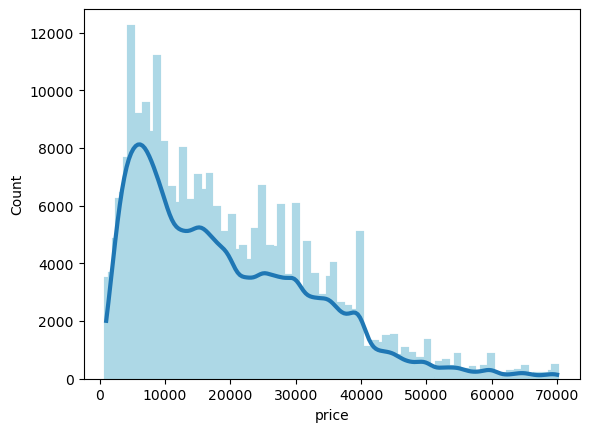

In [117]:
# Hist plot of the price.

ax = sns.histplot(df_vechile.price, kde=True, linewidth = 3, edgecolor = 'lightblue' ,line_kws={"linewidth": 3})


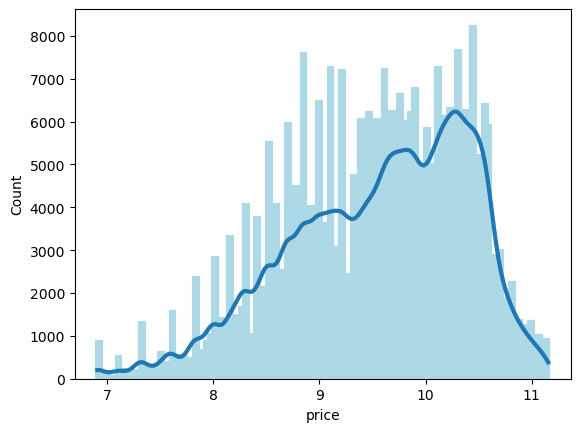

In [118]:
# Changing the price to logarithmic scale due to higher numeric values.
df_vechile['price'] = np.log(df_vechile['price'])
ax = sns.histplot(df_vechile.price, kde=True, linewidth = 3, edgecolor = 'lightblue' ,line_kws={"linewidth": 3})

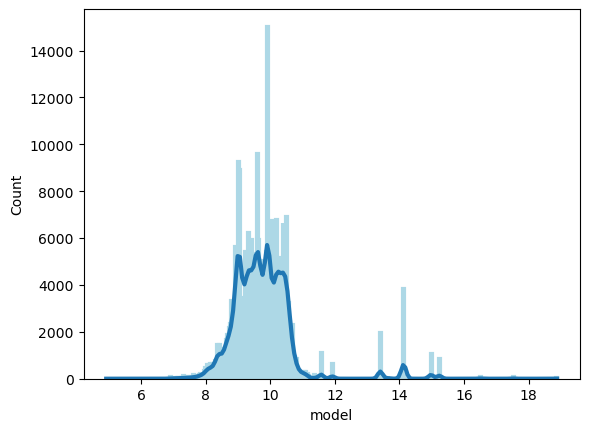

In [119]:
# Changing the model to logarithmic scale due to higher numeric values .
df_vechile['model'] = np.log(df_vechile['model'])
ax = sns.histplot(df_vechile.model, kde=True, linewidth = 3, edgecolor = 'lightblue' ,line_kws={"linewidth": 3})

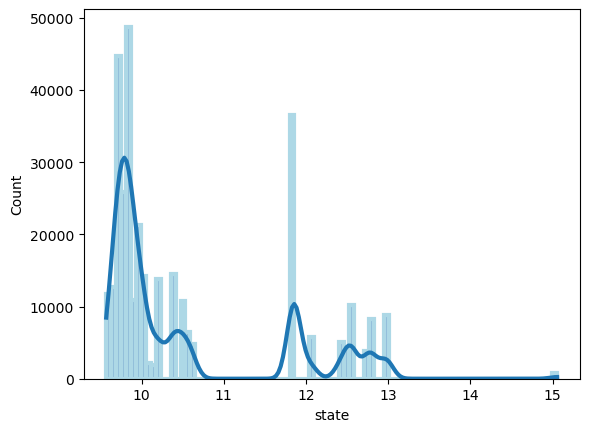

In [120]:
# Changing the state to logarithmic scale due to higher numeric values .
df_vechile['state'] = np.log(df_vechile['state'])
ax = sns.histplot(df_vechile.state, kde=True, linewidth = 3, edgecolor = 'lightblue' ,line_kws={"linewidth": 3})

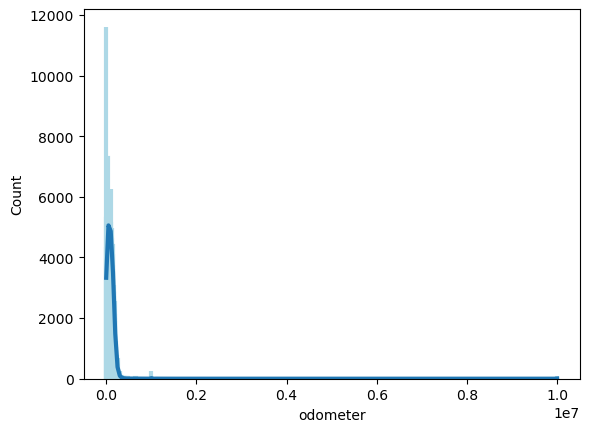

In [121]:
#df_vechile['odometer'] = np.log(df_vechile['odometer'])
ax = sns.histplot(df_vechile.odometer, kde=True, linewidth = 3, edgecolor = 'lightblue' ,line_kws={"linewidth": 3})

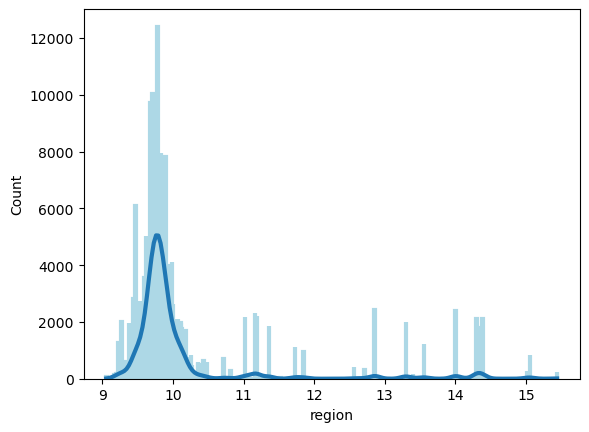

In [122]:
# Changing the region to logarithmic scale due to higher numeric values .
df_vechile['region'] = np.log(df_vechile['region'])
ax = sns.histplot(df_vechile.region, kde=True, linewidth = 3, edgecolor = 'lightblue' ,line_kws={"linewidth": 3})

<Axes: >

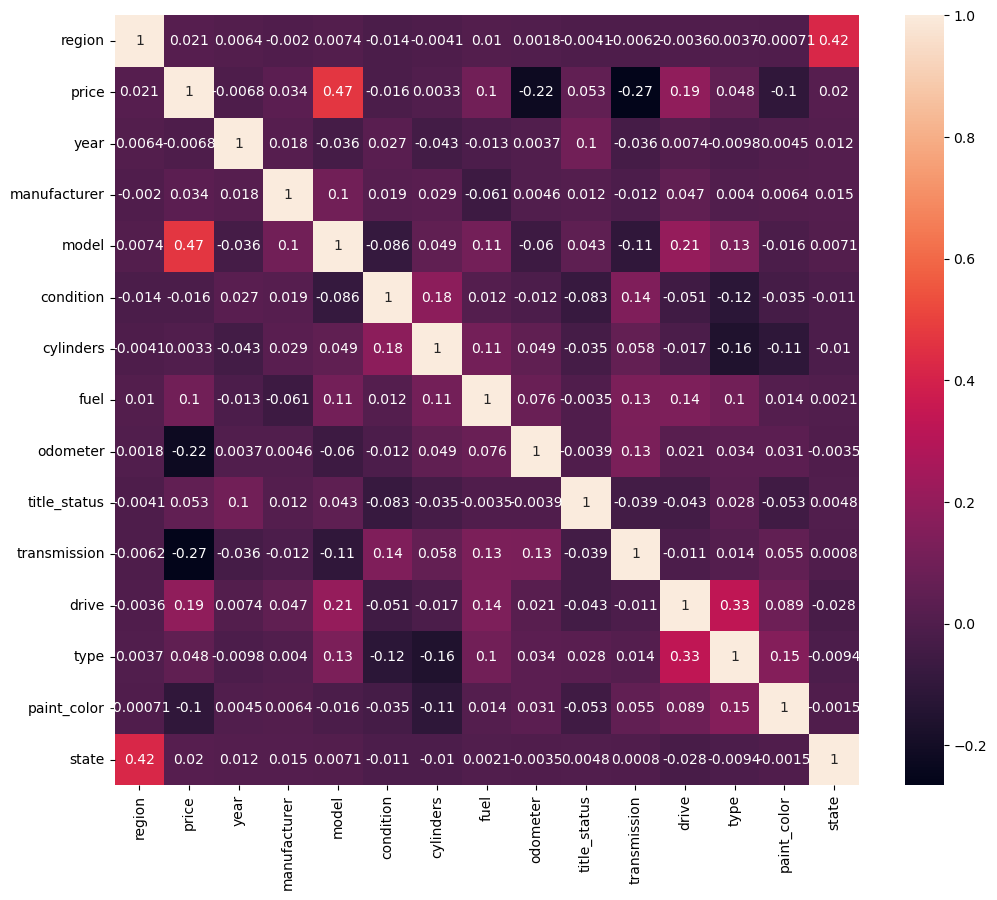

In [123]:
# Correlation of heat map agaist each features
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df_vechile.corr(), annot = True)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

- Used LinearRegression, Ridge and Lasso Modeling 
- Used Regularization technique over the Feature Selection to consider all the features.
- GridsearchCV to to find the optimal hyperparameters
- Used Mean Square error to check for the best model. Since the data is normalized and scaled and it is same price prediction agaist different model MSE is used over R2.

In [124]:
# Import the required modeling libraries from sklearn
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split

In [125]:
# Split the data as train and test set with size of 0.3 
X = df_vechile.drop('price', axis = 1)
y = df_vechile['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [126]:
# Linear Regression with the default Cross validation to find the optimal hyperparameters and MSE
pipe_lnr = Pipeline([('polyfeatures',PolynomialFeatures(degree = 1,include_bias = False)),
                 ('scaler', StandardScaler()), 
                 ('linear', LinearRegression())])
param_dict={'polyfeatures__degree' : range(1,3)}
selector_grid_lnr = GridSearchCV(estimator = pipe_lnr, param_grid=param_dict)
selector_grid_lnr.fit(X_train,y_train)
print(selector_grid_lnr.best_params_)
best_estimator = selector_grid_lnr.best_estimator_
train_mse_lnr = mean_squared_error(y_train,best_estimator.predict(X_train))
test_mse_lnr = mean_squared_error(y_test,best_estimator.predict(X_test))
print(train_mse_lnr)
print(test_mse_lnr)

{'polyfeatures__degree': 2}
0.22569984273853969
0.22699825657771858


In [127]:
# Ridge Regression with Cross validation of 3 to find the optimal hyperparameters and MSE
pipe_ridge = Pipeline([
                 ('polyfeatures',PolynomialFeatures(degree = 1,include_bias = False)),
                
                 ('scaler', StandardScaler()), 
                 ('ridge', Ridge())])
param_dict={'polyfeatures__degree' : range(1,3),
           'ridge__alpha': np.logspace(0, 10)}
selector_grid_ridge = GridSearchCV(estimator = pipe_ridge, param_grid=param_dict,scoring = "neg_mean_squared_error",
                            cv = 3)
selector_grid_ridge.fit(X_train,y_train)
print(selector_grid_ridge.best_params_)
best_estimator = selector_grid_ridge.best_estimator_
train_mse_ridge = mean_squared_error(y_train,best_estimator.predict(X_train))
test_mse_ridge = mean_squared_error(y_test,best_estimator.predict(X_test))
print(train_mse_ridge)
print(test_mse_ridge)

{'polyfeatures__degree': 2, 'ridge__alpha': 1.0}
0.22580626996083794
0.22699767376359653


In [128]:
# Lasso Regression using GridSearchCV with default Cross validation to find the optimal hyperparameters and MSE
pipe_lasso = Pipeline([
                 ('polyfeatures',PolynomialFeatures(degree = 1,include_bias = False)),
                 ('scaler', StandardScaler()), 
                 ('lasso', Lasso())])
param_dict={'polyfeatures__degree' : range(1,3)}

selector_grid_lasso = GridSearchCV(estimator = pipe_lasso, param_grid=param_dict)
selector_grid_lasso.fit(X_train,y_train)
print(selector_grid_lasso.best_params_)
best_estimator = selector_grid_ridge.best_estimator_
train_mse_lasso = mean_squared_error(y_train,best_estimator.predict(X_train))
test_mse_lasso = mean_squared_error(y_test,best_estimator.predict(X_test))
print(train_mse_lasso)
print(test_mse_lasso)

{'polyfeatures__degree': 1}
0.22580626996083794
0.22699767376359653


In [253]:
pd.DataFrame([['0.22569984273853969', '0.22580626996083794', '0.22580626996083794']],columns = ['Linear', 'Ridge', 'Lasso'], index = ['Test MSE'])

,Linear,Ridge,Lasso
Test MSE,0.22569984273853969,0.22580626996083794,0.22580626996083794


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

- Based on the Modeling analysis all the model has almost same Mean Squared Error. 
- For the Evaluation purpose I am choosing Ridge and LinearRegression 
- Calculate the co-efficient of the features for each of the models
- Compare the Permutation Imortance of those two models to identify the features that impacts the car price 

#### Coefficient and Permutation Importance of Ridge Regression 

In [129]:
# Get the best estimator for the ridge model and map the coefficient to the column
best_estimator_ridge = selector_grid_ridge.best_estimator_
best_model_ridge = selector_grid_ridge.best_estimator_.named_steps['ridge']
feature_names = best_estimator_ridge.named_steps['polyfeatures'].get_feature_names_out()
coefs = best_model_ridge.coef_
print(best_estimator_ridge)
#print(f'Features from best selector: {feature_names}.')
print('Coefficient values: ')
print('===================')

pd.DataFrame([coefs.T], columns = feature_names, index = ['ridge'])

Pipeline(steps=[('polyfeatures', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('ridge', Ridge())])
Coefficient values: 


,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,...,drive^2,drive type,drive paint_color,drive state,type^2,type paint_color,type state,paint_color^2,paint_color state,state^2
ridge,0.44826,-1.62698,-1.847097,2.786867,5.344203,-0.08747,-0.4527,0.833674,-0.269395,0.936916,...,-0.116911,-0.038754,-0.009862,-0.013823,-0.316816,-0.017094,-0.007222,0.01254,0.00335,-0.366816


In [130]:
# calculate the perumuation_importanace of the column for the ridge model

from sklearn.inspection import permutation_importance
r = permutation_importance(best_estimator_ridge, X_test, y_test,
                          n_repeats=30,
                          random_state=22)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{best_estimator.feature_names_in_[i]:<15}"
            f"{r.importances_mean[i]:.3f}"
                f" +/- {r.importances_std[i]:.3f}")

model          0.480 +/- 0.002
year           0.283 +/- 0.039
odometer       0.207 +/- 0.019
condition      0.157 +/- 0.018
fuel           0.043 +/- 0.004
manufacturer   0.017 +/- 0.002
cylinders      0.016 +/- 0.000
drive          0.008 +/- 0.000
type           0.006 +/- 0.001
transmission   0.006 +/- 0.001
paint_color    0.003 +/- 0.000
region         0.003 +/- 0.000
title_status   0.002 +/- 0.000
state          0.001 +/- 0.000


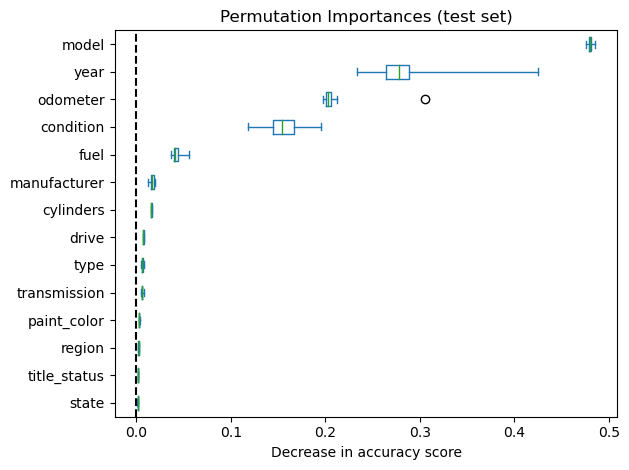

In [131]:
# Plot the Permutation Importance and feature accuracy
sorted_importances_idx = r.importances_mean.argsort()
importances = pd.DataFrame(
    r.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

#### Coefficient and Permutation Importance of Linear Regression 

In [132]:
# Get the best estimator for the ridge model and map the coefficient to the column
best_estimator_lnr = selector_grid_lnr.best_estimator_
best_model_lnr = selector_grid_lnr.best_estimator_.named_steps['linear']
feature_names = best_estimator_lnr.named_steps['polyfeatures'].get_feature_names_out()
coefs = best_model_lnr.coef_
print(best_estimator_lnr)
#print(f'Features from best selector: {feature_names}.')
print('Coefficient values: ')
print('===================')

pd.DataFrame([coefs.T], columns = feature_names, index = ['linear'])

Pipeline(steps=[('polyfeatures', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('linear', LinearRegression())])
Coefficient values: 


,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,...,drive^2,drive type,drive paint_color,drive state,type^2,type paint_color,type state,paint_color^2,paint_color state,state^2
linear,0.448742,-1.52283,-2.921985,2.791974,7.296307,-0.098596,-0.454291,0.959195,-0.265226,0.962507,...,-0.11642,-0.038419,-0.009687,-0.014278,-0.316391,-0.016926,-0.007165,0.012295,0.003799,-0.374079


In [133]:
# calculate the perumuation_importanace of the column for LinearRegression Model

from sklearn.inspection import permutation_importance
r = permutation_importance(best_estimator_lnr, X_test, y_test,
                          n_repeats=30,
                          random_state=22)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{best_estimator.feature_names_in_[i]:<15}"
            f"{r.importances_mean[i]:.3f}"
                f" +/- {r.importances_std[i]:.3f}")

model          0.479 +/- 0.002
year           0.421 +/- 0.055
condition      0.280 +/- 0.033
odometer       0.207 +/- 0.022
fuel           0.043 +/- 0.004
manufacturer   0.036 +/- 0.006
cylinders      0.016 +/- 0.000
drive          0.008 +/- 0.000
transmission   0.007 +/- 0.001
type           0.006 +/- 0.001
paint_color    0.003 +/- 0.000
region         0.003 +/- 0.000
title_status   0.002 +/- 0.000
state          0.002 +/- 0.000


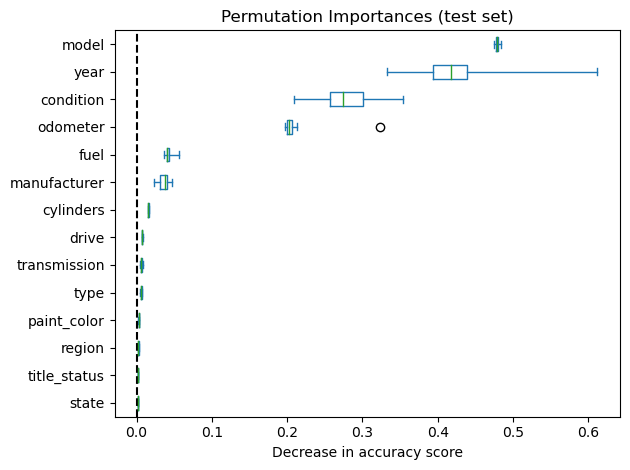

In [134]:
# Plot the Permutation Importance and feature accuracy
sorted_importances_idx = r.importances_mean.argsort()
importances = pd.DataFrame(
    r.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

- The Goal is to identify what features impacts the car price based on the past Dataset of information on 426K cars.

- We have Evaluated three different Models and choose two best models to identify the top 4 features that affects the car price

- Based on Model Findings the top four features that impacts the price of the cars are
    - model
    - year
    - odometer 
    - conidtion

### Price
- The Price range of the cars sold after removing the outlier shows the more cars are sold in between 1k to 40K

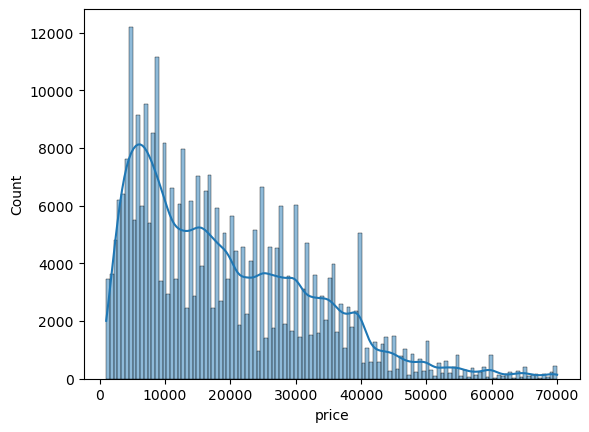

In [141]:
####  Price Range of the Cars sold after removing outlier
ax = sns.histplot(df_clean, x = 'price', kde=True)


### Model of the Car
The Top Models which are sold over 2000 vechiels shows F-150 is the top selling model followed by the below models
- unknown
- silverado 1500
- 1500
- silverado
- camry
- accord
- civic
- escape

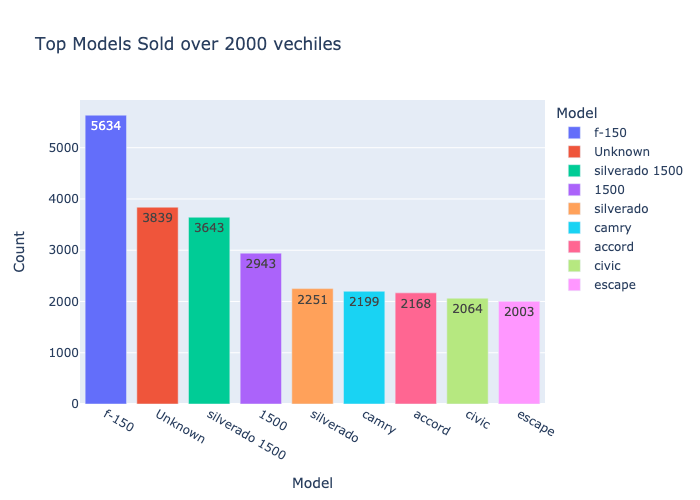

In [232]:
#### Model of the Cars sold
df_model = df_clean['model'].value_counts(ascending = False).to_frame().reset_index()
df_model = df_model[df_model['count'] > 2000]

fig2 = px.bar(df_model, x = 'model', y = 'count', color = 'model',
       title = 'Top Models Sold over 2000 vechiles', 
       labels = {"model" : "Model", "count" : "Count"}, text_auto = True )
fig2.show("png")

### Make Year
The Mean price based on year and model shows that the cars make after 2000 year has high mean selling price
- The upward curve in the price for the Silverado 1500 and escape model shows higher sold price for the make year after 2000 

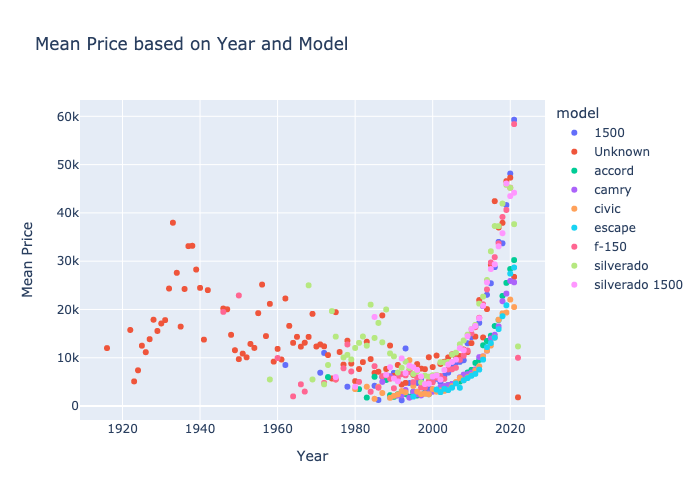

In [233]:
#### Make Years of the Cars sold
df_year = df_clean[df_clean['model'].isin(df_model['model'].tolist())]
df_year = df_year.groupby(by = ['model','year']).agg({'price':'mean'}).reset_index()
df_year = df_year[df_year['year'] > 0]
fig3 = px.scatter(df_year, x = 'year', y = 'price', color = 'model',
       title = 'Mean Price based on Year and Model', 
       labels = {"year" : "Year", "price" : "Mean Price"} )
fig3.show("png")

### Odometer
The Mean price range is higher for the lower miles of the car

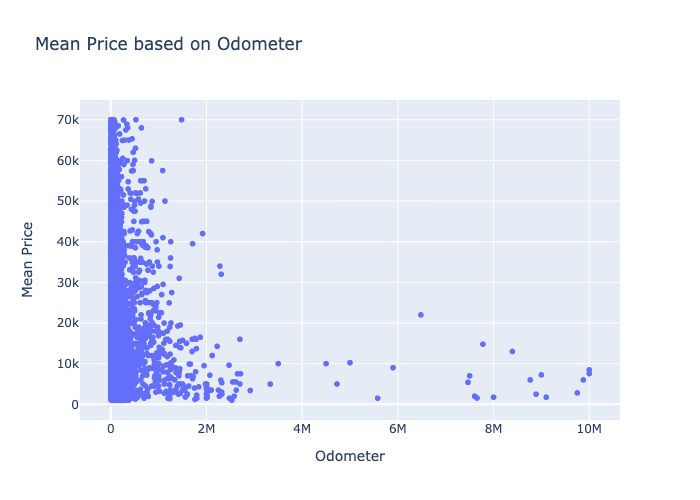

In [234]:
#### Odometer of the Cars sold
df_odometer = df_clean
df_odometer = df_clean.groupby(by = ['odometer']).agg({'price':'mean'}).reset_index()
fig4 = px.scatter(df_odometer, x = 'odometer', y = 'price',
       title = 'Mean Price based on Odometer', 
       labels = {"odometer" : "Odometer", "price" : "Mean Price"} )
fig4.show("png")

### Condition
The condition and mean price comparision shows the price is higher for the new and new like conidtions. 

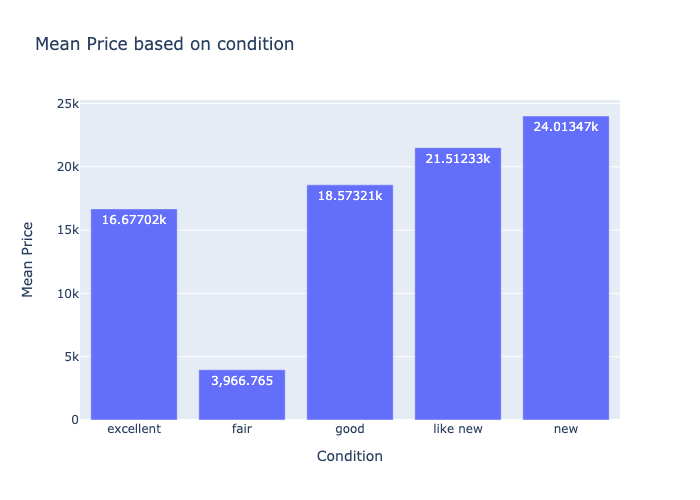

In [249]:
#### Condition of the Cars sold
df_condition = df_clean[df_clean['model'].isin(df_model['model'].tolist())]
df_condition = df_condition.groupby(by = ['condition']).agg({'price':'mean'}).reset_index()
df_condition.head()

fig5 = px.bar(df_condition, x = 'condition', y = 'price',
       title = 'Mean Price based on condition', 
       labels = {"condition" : "Condition", "price" : "Mean Price"}, text_auto = True)
fig5.show("png")

## Recommendation and Next Steps
Collect more data to test and deploy the model to make the price range target for selling.